In [5]:
from __future__ import division
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy.misc import derivative
%matplotlib inline

Queremos estimar $\mathbb{E}(X)=\alpha \beta=\mu$ proponemos usar el máximo verosímil ($\hat\mu$) y el estimador de momentos ($\bar{X}$). Queremos calcular su eficiencia relativa y saber que estimador conviene usar debido que el máximo verosmil se tiene que aproximar númericamente. El estimador de momento

En clase usamos una reparametrizacion de la función de densidad que dependía de $\mu$ $$f(x|\mu,\beta)=\frac{1}{\Gamma(\mu/\beta)\beta^{\mu/\beta}}x^{ e^{-x/\beta}-1} e^{-x/\beta}$$
La eficiencia asintotica relativa esta dada por $$\text{ARE}(\bar{X},\hat{\mu})=\frac{\mathbb{E}(\frac{d}{d\mu}l(\mu,\beta|X))^2}{\beta\mu}$$
Necesitamos calcular la derivada de la log verosimilitud y posteriormente integrarla 

In [44]:
Gamma = lambda x,mu,b: 1/(m.gamma(mu/b)*(b**(mu/b)))*(x**(mu/b-1))*m.exp(-x/b)
logGamma = lambda x,mu,b: m.log(Gamma(x,mu,b))
#Definimos la densidad de Gamma y el logaritmo de la densidad

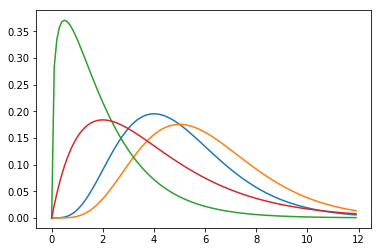

In [21]:
#Unas gráficas de con algunos parametros para mu y beta
x1 = [Gamma(x,5,1) for x in np.arange(0,12,0.1)]
x2 = [Gamma(x,6,1) for x in np.arange(0,12,0.1)]
x3 = [Gamma(x,2,1.5) for x in np.arange(0,12,0.1)]
x4 = [Gamma(x,4,2) for x in np.arange(0,12,0.1)]
p = plt.plot(np.arange(0,12,0.1),x1,np.arange(0,12,0.1),x2,np.arange(0,12,0.1),x3,np.arange(0,12,0.1),x4)

In [38]:
#Función para derivar parcialmente
def partial_derivative(func, var=0, point=[]):
    args = point[:]
    def wraps(x):
        args[var] = x
        return func(*args)
    return derivative(wraps, point[var], dx = 1e-6)

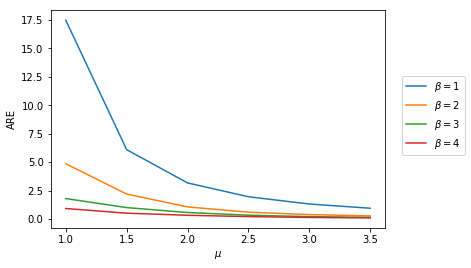

In [121]:
#Integramos la derivada de la logGamma al cuadrado con respecto a la densidad
inf = 300
for b in [1,2,3,4]:
    L = []
    for mu in np.arange(1,4,0.5):
        d = [(partial_derivative(logGamma,1,[x,mu,b])**2)*Gamma(x,mu,b) for x in np.arange(0.01,inf,0.1)]
        L.append((np.trapz(d))/(b*mu))
    G = plt.plot(np.arange(1,4,0.5),L,label='$\\beta={}$'.format(b))
plt.ylabel('ARE')
plt.xlabel('$\mu$')
leg = plt.legend(bbox_to_anchor=(1.05, 0.7), loc='upper left', borderaxespad=0.)

Sabemos que la varianza del EMV debe ser menor, por lo tanto la eficiencia debe ser mayor a 1, sin embargo concluimos que cuando $\mu$ es mayor no se tiene tanta perdida usando el estimador obtenido por el metodo de momentos